In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
df_plotting = pd.read_csv('Data_Marketing_Customer_Analysis_Round2.csv')



    Now we will try to check the normality of the numerical variables visually
        Use Matplotlib to construct histograms
        Do the distributions for different numerical variables look like a normal distribution
    For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
    Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.


In [3]:
df_plotting

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
df_plotting.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5]:
df_plotting.drop(columns=["Unnamed: 0"], inplace = True)

In [6]:
df_plotting.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [7]:
types_columns_cat = df_plotting.select_dtypes(include=object)

In [8]:
types_columns_cat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [9]:
types_columns_int = types_columns_cat = df_plotting.select_dtypes(include=int)
types_columns_int

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies
0,48029,61,52,9
1,0,64,26,1
2,22139,100,31,2
3,49078,97,3,2
4,23675,117,31,7
...,...,...,...,...
10905,0,253,40,7
10906,61146,65,68,6
10907,39837,201,63,2
10908,64195,158,27,6


In [10]:
types_columns_float = types_columns_cat = df_plotting.select_dtypes(include=float)
types_columns_float

,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


In [11]:
types_columns_num = pd.concat([types_columns_int, types_columns_float], axis=1)

In [12]:
types_columns_num 

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,48029,61,52,9,4809.216960,7.0,0.0,292.800000
1,0,64,26,1,2228.525238,3.0,0.0,744.924331
2,22139,100,31,2,14947.917300,34.0,0.0,480.000000
3,49078,97,3,2,22332.439460,10.0,0.0,484.013411
4,23675,117,31,7,9025.067525,NaN,NaN,707.925645
...,...,...,...,...,...,...,...,...
10905,0,253,40,7,15563.369440,NaN,NaN,1214.400000
10906,61146,65,68,6,5259.444853,7.0,0.0,273.018929
10907,39837,201,63,2,23893.304100,11.0,0.0,381.306996
10908,64195,158,27,6,11971.977650,0.0,4.0,618.288849


In [13]:
## Use seaborn library to construct distribution plots for the numerical variables

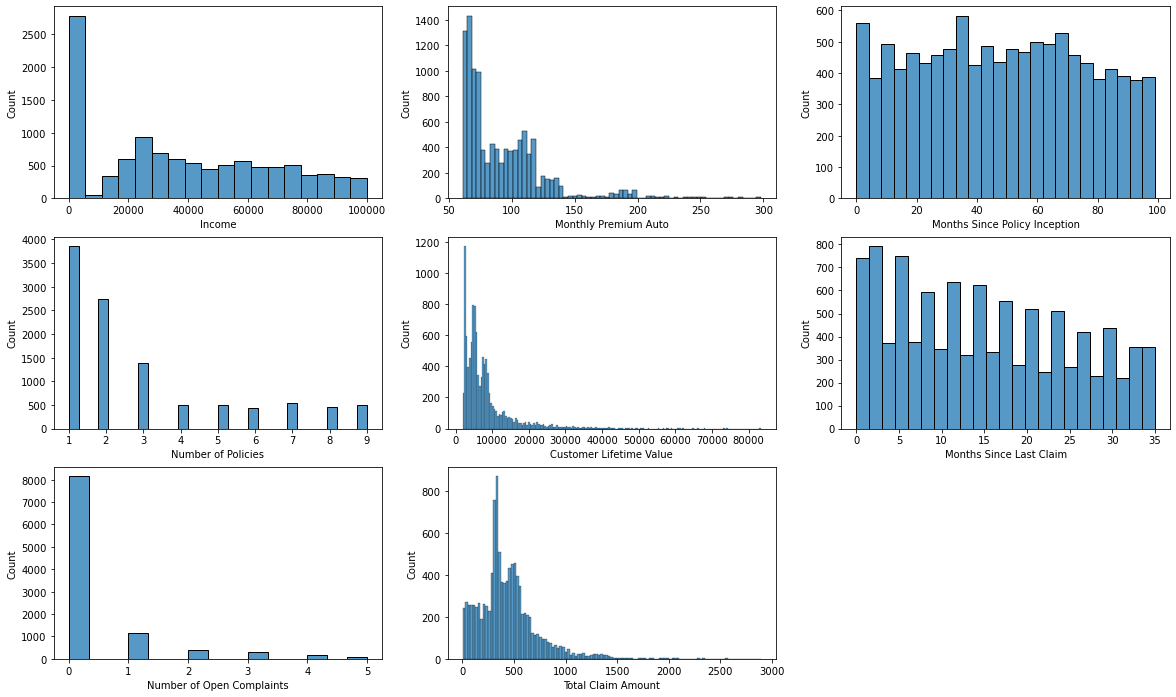

In [14]:
plt.figure(figsize=(20,12))
for i, column in enumerate(types_columns_num,1):
    plt.subplot(3,3,i)
    sns.histplot(types_columns_num[column])

In [15]:
normalized_numerical = (types_columns_num-types_columns_num.min())/(types_columns_num.max()-types_columns_num.min())

In [16]:
normalized_numerical

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,0.480381,0.000000,0.525253,1.000,0.035752,0.200000,0.0,0.101171
1,0.000000,0.012658,0.262626,0.000,0.004059,0.085714,0.0,0.257445
2,0.221432,0.164557,0.313131,0.125,0.160264,0.971429,0.0,0.165875
3,0.490873,0.151899,0.030303,0.125,0.250953,0.285714,0.0,0.167263
4,0.236795,0.236287,0.313131,0.750,0.087527,NaN,NaN,0.244657
...,...,...,...,...,...,...,...,...
10905,0.000000,0.810127,0.404040,0.750,0.167823,NaN,NaN,0.419717
10906,0.611576,0.016878,0.686869,0.625,0.041281,0.200000,0.0,0.094333
10907,0.398446,0.590717,0.636364,0.125,0.270122,0.314286,0.0,0.131763
10908,0.642072,0.409283,0.272727,0.625,0.123717,0.000000,0.8,0.213674


plt.figure(figsize=(20,12))
for i, column in enumerate(normalized_numerical,1):
    plt.subplot(3,3,i)
    sns.histplot(normalized_numerical[column])

In [17]:
import statistics as stats

In [18]:
Q1_TCA = np.percentile(types_columns_num['Total Claim Amount'], 25)
Q1_TCA

271.08252675

In [19]:
Q3_TCA = np.percentile(types_columns_num['Total Claim Amount'], 75)
Q3_TCA

547.2

In [20]:
IQR_Total_Claim_Amount = Q3_TCA - Q1_TCA
IQR_Total_Claim_Amount

276.11747325000005

In [21]:
max_Total_Claim_Amount = types_columns_num['Total Claim Amount'] <= (Q3_TCA + 1.5 * IQR_Total_Claim_Amount)
max_Total_Claim_Amount

0         True
1         True
2         True
3         True
4         True
         ...  
10905    False
10906     True
10907     True
10908     True
10909    False
Name: Total Claim Amount, Length: 10910, dtype: bool

In [22]:
cleaned_TCA = types_columns_num['Total Claim Amount'][max_Total_Claim_Amount]

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Count'>

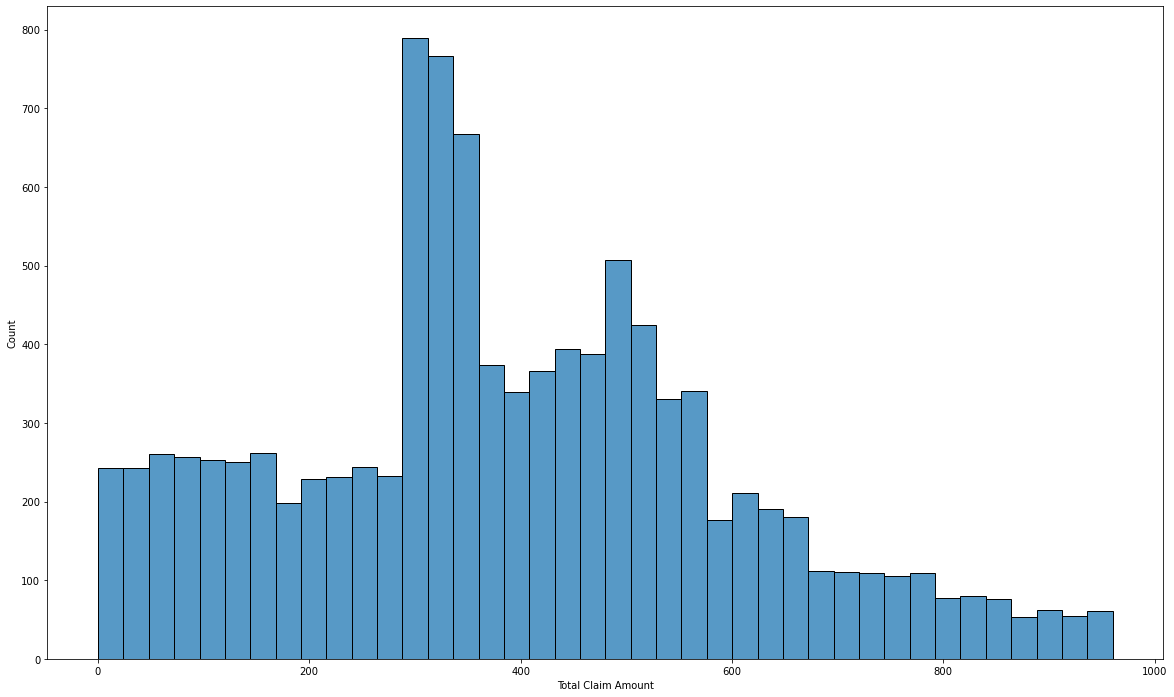

In [23]:
plt.figure(figsize=(20,12))
sns.histplot(cleaned_TCA)

In [24]:
Q1_CTV = np.percentile(types_columns_num['Customer Lifetime Value'], 25)
Q1_CTV

4014.453113

In [25]:
Q3_CTV = np.percentile(types_columns_num['Customer Lifetime Value'], 75)
Q3_CTV

8992.779137

In [26]:
IQR_CTV = Q3_CTV - Q1_CTV
IQR_CTV

4978.326024

In [27]:
max_CTV = types_columns_num['Customer Lifetime Value'] <= (Q3_CTV + 1.5 * IQR_CTV)
max_CTV

0         True
1         True
2         True
3        False
4         True
         ...  
10905     True
10906     True
10907    False
10908     True
10909     True
Name: Customer Lifetime Value, Length: 10910, dtype: bool

In [28]:
cleaned_CTV = types_columns_num['Customer Lifetime Value'][max_CTV]

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Count'>

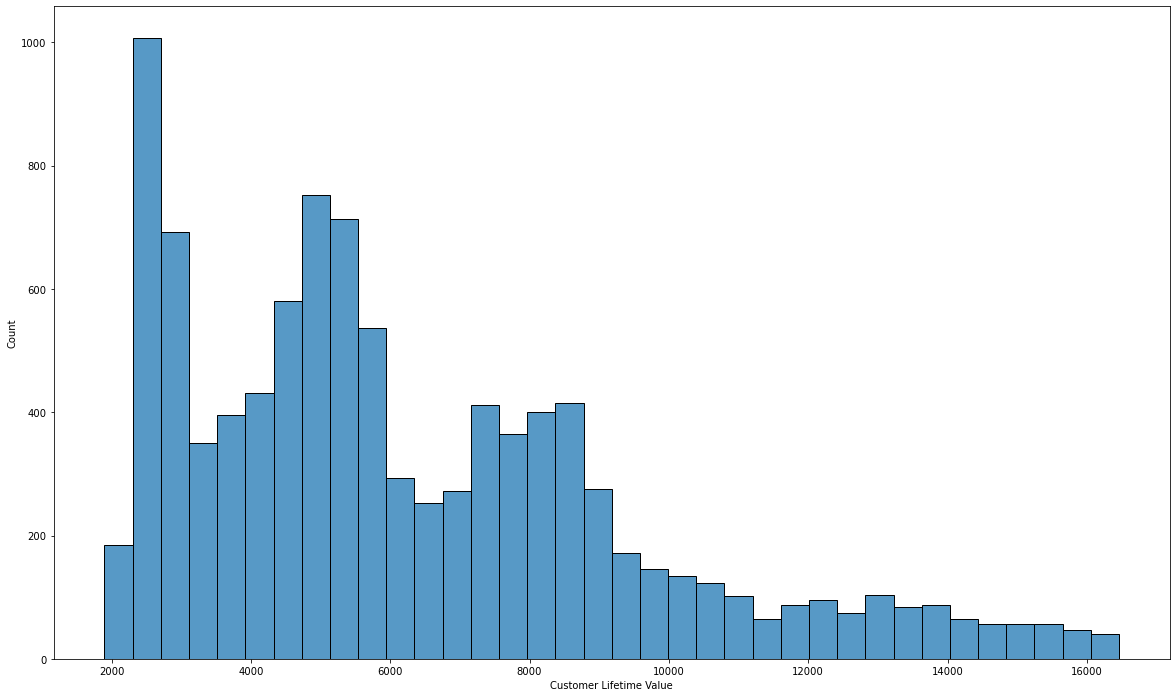

In [29]:
plt.figure(figsize=(20,12))
sns.histplot(cleaned_CTV)

In [30]:
Q1_MPA = np.percentile(types_columns_num['Monthly Premium Auto'], 25)
Q1_MPA

68.0

In [31]:
Q3_MPA = np.percentile(types_columns_num['Monthly Premium Auto'], 75)
Q3_MPA

109.0

In [32]:
IQR_MPA = Q3_MPA - Q1_MPA
IQR_MPA

41.0

In [33]:
max_MPA = types_columns_num['Monthly Premium Auto'] <= (Q3_MPA + 1.5 * IQR_MPA)
max_MPA

0         True
1         True
2         True
3         True
4         True
         ...  
10905    False
10906     True
10907    False
10908     True
10909     True
Name: Monthly Premium Auto, Length: 10910, dtype: bool

In [34]:
cleaned_MPA = types_columns_num['Monthly Premium Auto'][max_MPA]

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Count'>

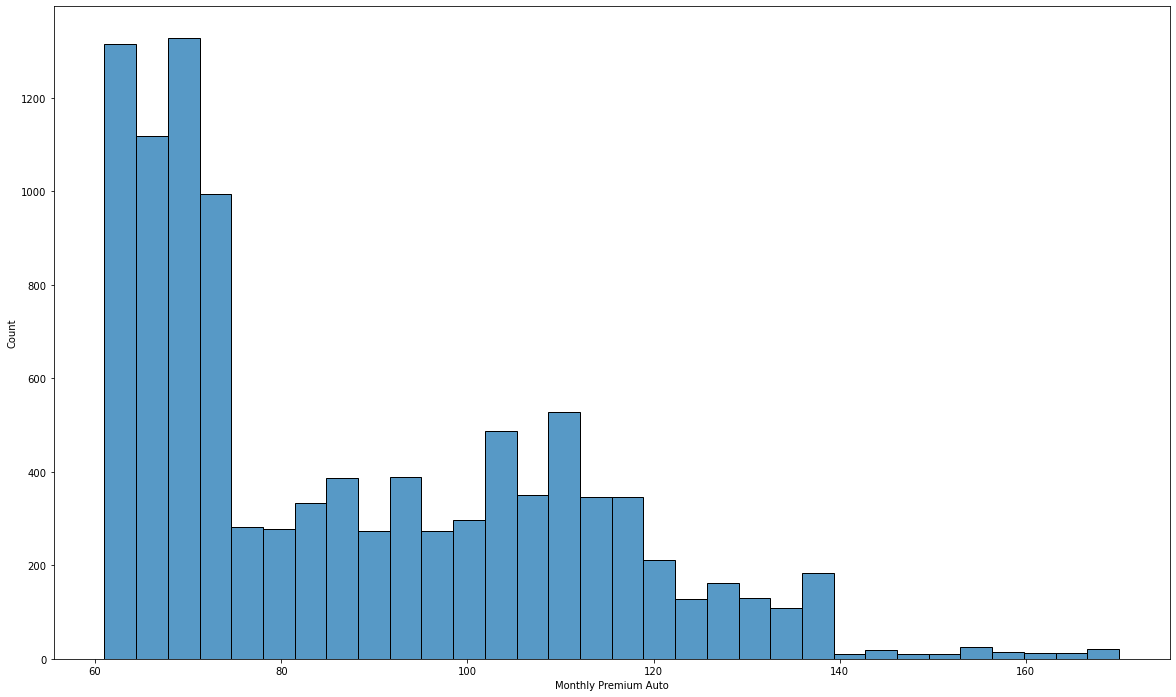

In [35]:
plt.figure(figsize=(20,12))
sns.histplot(cleaned_MPA)